# ПРОГНОЗИРОВАНИЕ №8.3 - UNITS

In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,21 mins 35 secs
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,2 months and 3 days
H2O_cluster_name:,H2O_from_python_unknownUser_8kq0dq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.742 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [3]:
#file = '/content/drive/MyDrive/Colab Notebooks/Diplom/df4eda2clean2.csv'
file = 'df2prep4regressionV8.csv'
df = h2o.import_file(file)
df = df.drop('C1')
df = df.drop('Revenue_cat')
df = df.drop('Revenue_T')
df = df.drop('abc_xyz_class')
df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Zip,Units,Manufacturer,MonthNo,Model_id_number,CategoryInSegment
6111,12,Natura,12,44,UrbanConvenience
92879,7,Pirum,12,32,RuralProductivity
92879,7,Pirum,12,31,RuralProductivity
32901,3,VanArsdel,12,94,UrbanModeration
84770,3,Currus,12,8,RuralSelect
95380,3,Abbas,12,33,UrbanModeration
14559,2,Natura,12,14,YouthYouth
16301,2,Natura,12,14,YouthYouth
48439,2,Quibus,12,4,RuralSelect
21787,2,VanArsdel,12,70,UrbanModeration


In [4]:
train, valid, unseen = df.split_frame(ratios=[0.7, 0.15])

In [4]:
train

Zip,Manufacturer,MonthNo,Model_id_number,CategoryInSegment,abc_xyz_class
6111,Natura,12,44,UrbanConvenience,BY
92879,Pirum,12,32,RuralProductivity,BY
92879,Pirum,12,31,RuralProductivity,BY
32901,VanArsdel,12,94,UrbanModeration,AY
84770,Currus,12,8,RuralSelect,AZ
95380,Abbas,12,33,UrbanModeration,BZ
16301,Natura,12,14,YouthYouth,BY
48439,Quibus,12,4,RuralSelect,BX
21787,VanArsdel,12,70,UrbanModeration,AY
7503,Currus,12,5,MixAll Season,BY


In [5]:
valid

Zip,Manufacturer,MonthNo,Model_id_number,CategoryInSegment,abc_xyz_class
14559,Natura,12,14,YouthYouth,BY
70578,VanArsdel,12,69,UrbanConvenience,AX
30901,Natura,12,36,UrbanExtreme,AY
85629,Natura,12,36,UrbanExtreme,AY
16412,Aliqui,12,6,UrbanExtreme,AY
79907,Currus,12,5,UrbanExtreme,AY
11757,Currus,12,24,UrbanExtreme,AY
6492,Currus,12,24,UrbanExtreme,AY
44130,Natura,12,16,UrbanExtreme,AY
17408,VanArsdel,12,12,UrbanModeration,AX


In [6]:
unseen

Zip,Manufacturer,MonthNo,Model_id_number,CategoryInSegment,abc_xyz_class
60101,Aliqui,12,5,UrbanExtreme,AX
97140,Aliqui,12,6,UrbanExtreme,AY
56097,VanArsdel,12,54,UrbanModeration,AX
48656,VanArsdel,12,54,UrbanModeration,AX
70506,VanArsdel,12,54,UrbanModeration,AX
78226,VanArsdel,12,54,UrbanModeration,AX
25312,Currus,12,5,UrbanExtreme,AY
13433,VanArsdel,12,11,UrbanModeration,AX
68123,VanArsdel,12,11,UrbanModeration,AX
17402,VanArsdel,12,11,UrbanModeration,AX


In [5]:
y = "Units"
x=train.columns
x.remove(y)

# Тренировка модели

nfolds=0 - это отключает перексрестную проверку и точность будет проверятся на указанной валидационной выборке

In [6]:
aml = H2OAutoML(
    max_models = 10,
    seed = 1,
    nfolds = 0 # отключение кросс валидации
)
aml.train(x = x, y = y, training_frame = train, validation_frame = valid)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_2_20230928_144236


Model Summary: 
    number_of_trees
--  -----------------
    75

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.06491585483414061
RMSE: 0.2547858999908367
MAE: 0.06424633402171327
RMSLE: 0.07066122887166772
Mean Residual Deviance: 0.06491585483414061

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.09901872380269561
RMSE: 0.31467240712000094
MAE: 0.07274516520059347
RMSLE: 0.08463410164326422
Mean Residual Deviance: 0.09901872380269561

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-09-28 14:42:36  0.004 sec   0                  0.623457         0.53031         0.388699             0.624574           0.529699          0.390092
    2023-09-28 14:42:41  5.103 sec   5                  0.323304         0.096363        0.104526             0.334655           0.0963477         0.111994
    2023-09-28 14:42:44  7.587 sec   10                 0.299604         0.0494635       0.0897627            0.319598           0.050863          0.102143
    2023-09-28 14:42:47  10.352 sec  15                 0.290865         0.054114        0.0846025            0.318912           0.0567255         0.101705
    2023-09-28 14:42:49  12.981 sec  20                 0.287529         0.0562486       0.0826731            0.317617           0.0592539         0.100881
    2023-09-28 14:42:52  15.590 sec  25                 0.28516          0.057365        0.0813165            0.318198           0.0607111         0.10125
    2023-09-28 14:42:55  18.890 sec  30                 0.279964         0.0584935       0.07838              0.316607           0.062593          0.10024
    2023-09-28 14:42:59  22.350 sec  35                 0.275481         0.0593962       0.0758896            0.315608           0.0641368         0.0996085
    2023-09-28 14:43:02  25.736 sec  40                 0.272462         0.060047        0.0742357            0.31517            0.065302          0.0993322
    2023-09-28 14:43:06  29.550 sec  45                 0.2674           0.0609571       0.0715028            0.314545           0.0671525         0.0989387
    2023-09-28 14:43:10  33.458 sec  50                 0.265117         0.0615419       0.0702869            0.313342           0.0681031         0.0981833
    2023-09-28 14:43:14  37.587 sec  55                 0.261992         0.0620388       0.0686396            0.313174           0.0692168         0.0980781
    2023-09-28 14:43:18  41.910 sec  60                 0.259595         0.0628752       0.0673897            0.313927           0.0703678         0.0985504
    2023-09-28 14:43:23  46.553 sec  65                 0.257941         0.0632974       0.0665334            0.313937           0.0711968         0.0985563
    2023-09-28 14:43:27  51.144 sec  70                 0.256437         0.0637342       0.0657598            0.31478            0.0718859         0.0990865
    2023-09-28 14:43:32  56.107 sec  75                 0.254786         0.0642463       0.0649159            0.314672           0.0727452         0.0990187

Variable Importances: 
variable                             relative_importance    scaled_importance       percentage
-----------------------------------  ---------------------  ----------------------  ----------------------
Zip                                  39614.6015625          1.0                     0.6179838621201823
Model_id_number                      10524.234375           0.2656655364410495      0.1641770142420698
MonthNo                              7400.3515625           0.18680868343013515     0.11544475166374142
CategoryI

In [7]:
lb = aml.leaderboard
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XGBoost_1_AutoML_2_20230928_144236,0.314672,0.0990187,0.0727452,0.0846341,0.0990187
XGBoost_2_AutoML_2_20230928_144236,0.318256,0.101287,0.057925,0.0796855,0.101287
GBM_4_AutoML_2_20230928_144236,0.320694,0.102844,0.0563137,0.0766512,0.102844
GBM_3_AutoML_2_20230928_144236,0.322088,0.103741,0.0568511,0.0768959,0.103741
XGBoost_3_AutoML_2_20230928_144236,0.322505,0.104009,0.0568566,0.0776708,0.104009
GBM_1_AutoML_2_20230928_144236,0.323608,0.104722,0.0570559,0.077197,0.104722
GBM_2_AutoML_2_20230928_144236,0.324495,0.105297,0.0569697,0.0771192,0.105297
DRF_1_AutoML_2_20230928_144236,0.324769,0.105475,0.0573083,0.0771724,0.105475
XRT_1_AutoML_2_20230928_144236,0.326367,0.106515,0.054698,0.0776656,0.106515
GLM_1_AutoML_2_20230928_144236,0.3305,0.10923,0.0583949,0.078759,0.10923


In [8]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(lb['model_id'].as_data_frame().iloc[:,0])
model_ids

['XGBoost_1_AutoML_2_20230928_144236',
 'XGBoost_2_AutoML_2_20230928_144236',
 'GBM_4_AutoML_2_20230928_144236',
 'GBM_3_AutoML_2_20230928_144236',
 'XGBoost_3_AutoML_2_20230928_144236',
 'GBM_1_AutoML_2_20230928_144236',
 'GBM_2_AutoML_2_20230928_144236',
 'DRF_1_AutoML_2_20230928_144236',
 'XRT_1_AutoML_2_20230928_144236',
 'GLM_1_AutoML_2_20230928_144236']

In [11]:
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#se = h2o.get_model([mid for mid in model_ids if "AutoML" in mid][0])
se

IndexError: list index out of range

In [10]:
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

AttributeError: type object 'ModelBase' has no attribute 'metalearner'

In [ ]:
metalearner.coef_norm()

In [ ]:
%matplotlib inline
metalearner.std_coef_plot()

# Что с важностью признаков

Model ID: XGBoost_1_AutoML_2_20230928_144236


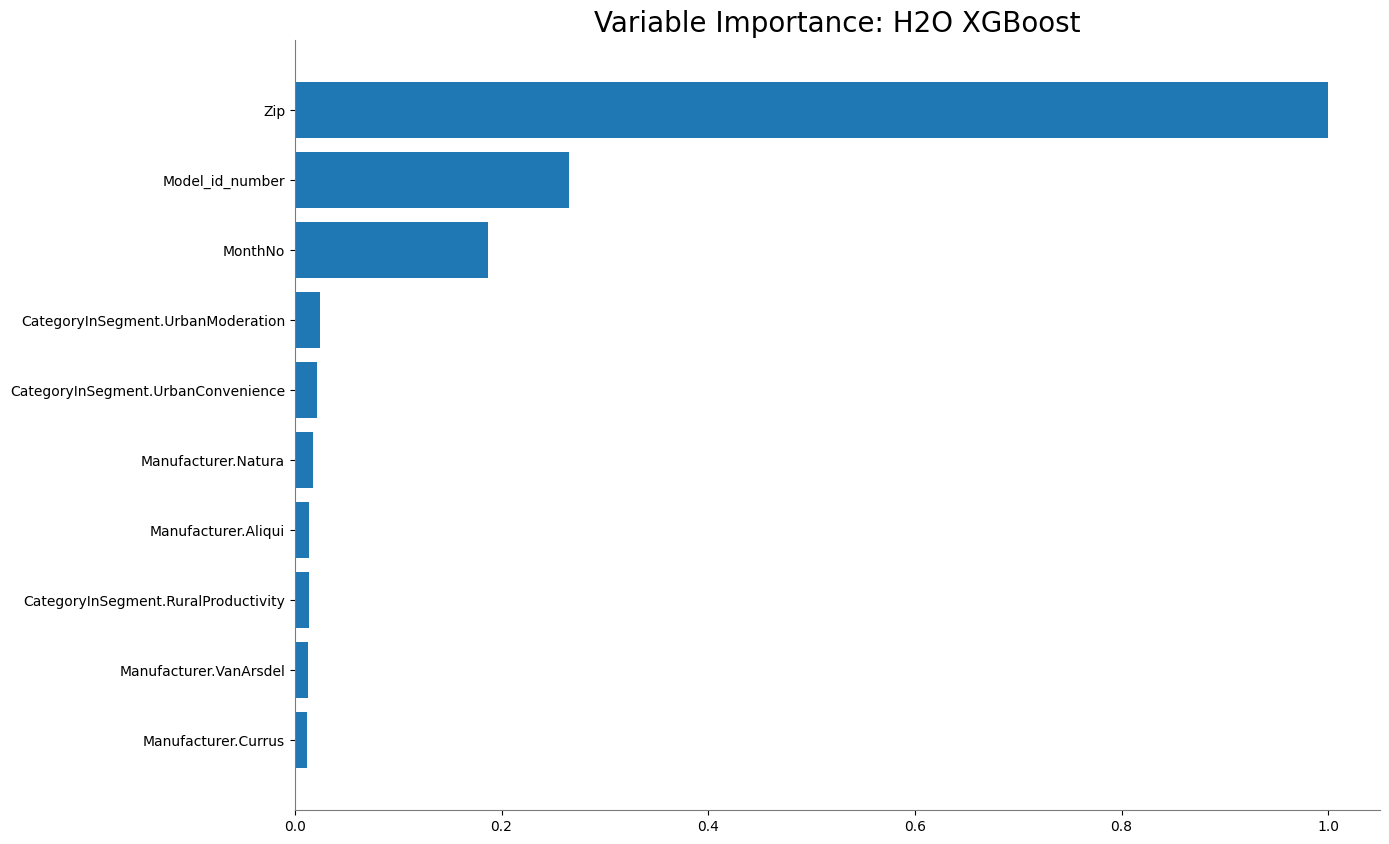

Model ID: XGBoost_2_AutoML_2_20230928_144236


<Figure size 640x480 with 0 Axes>

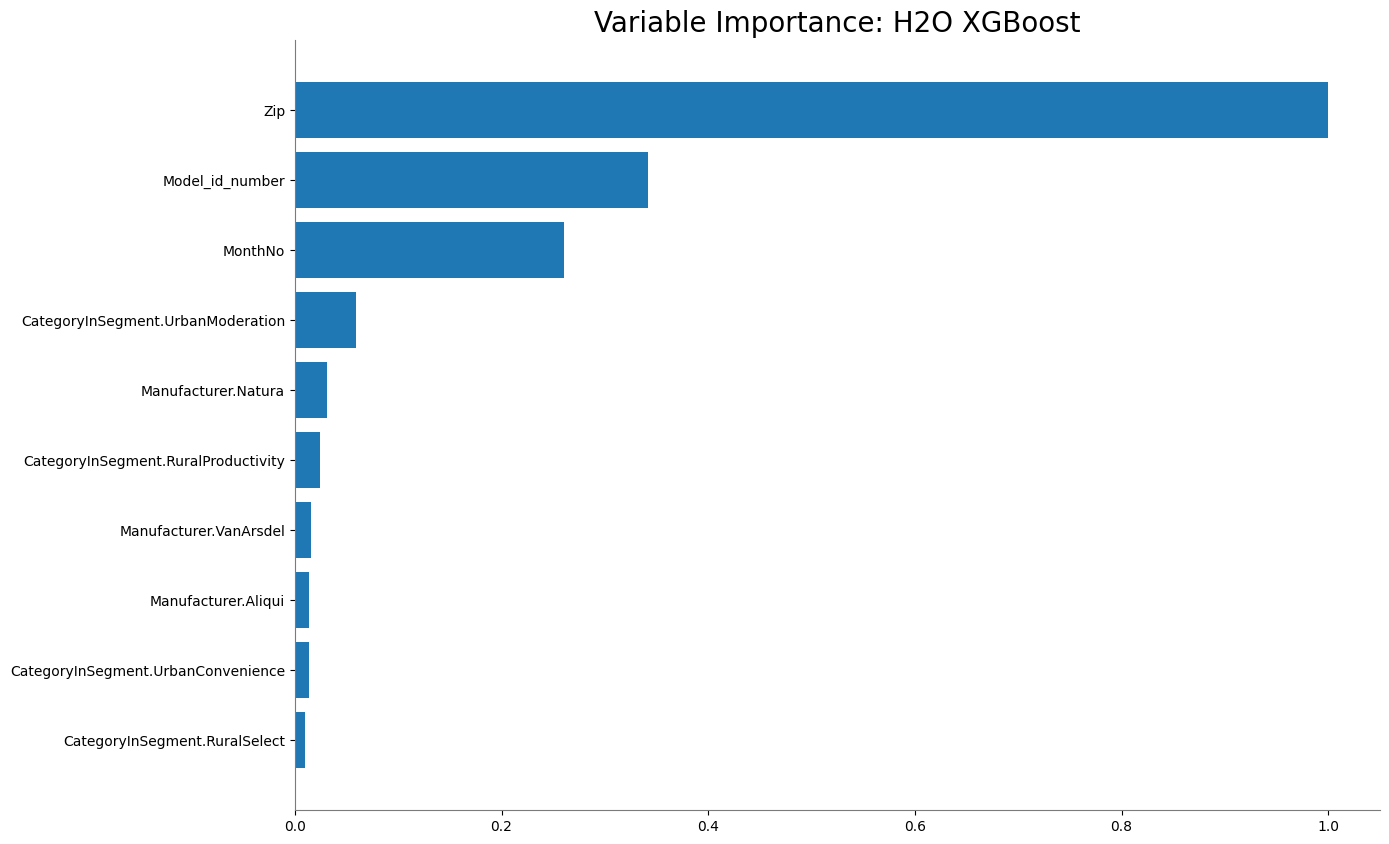

Model ID: GBM_4_AutoML_2_20230928_144236


<Figure size 640x480 with 0 Axes>

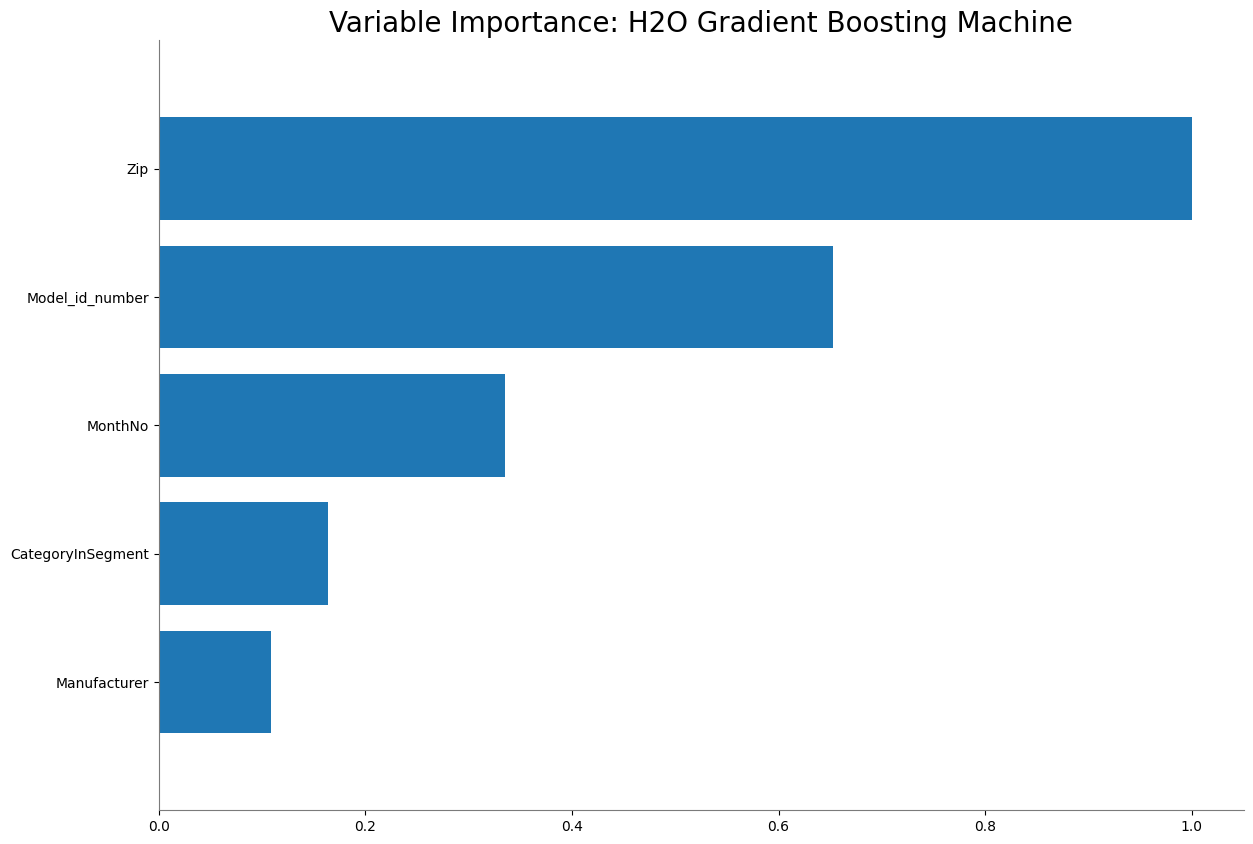

Model ID: GBM_3_AutoML_2_20230928_144236


<Figure size 640x480 with 0 Axes>

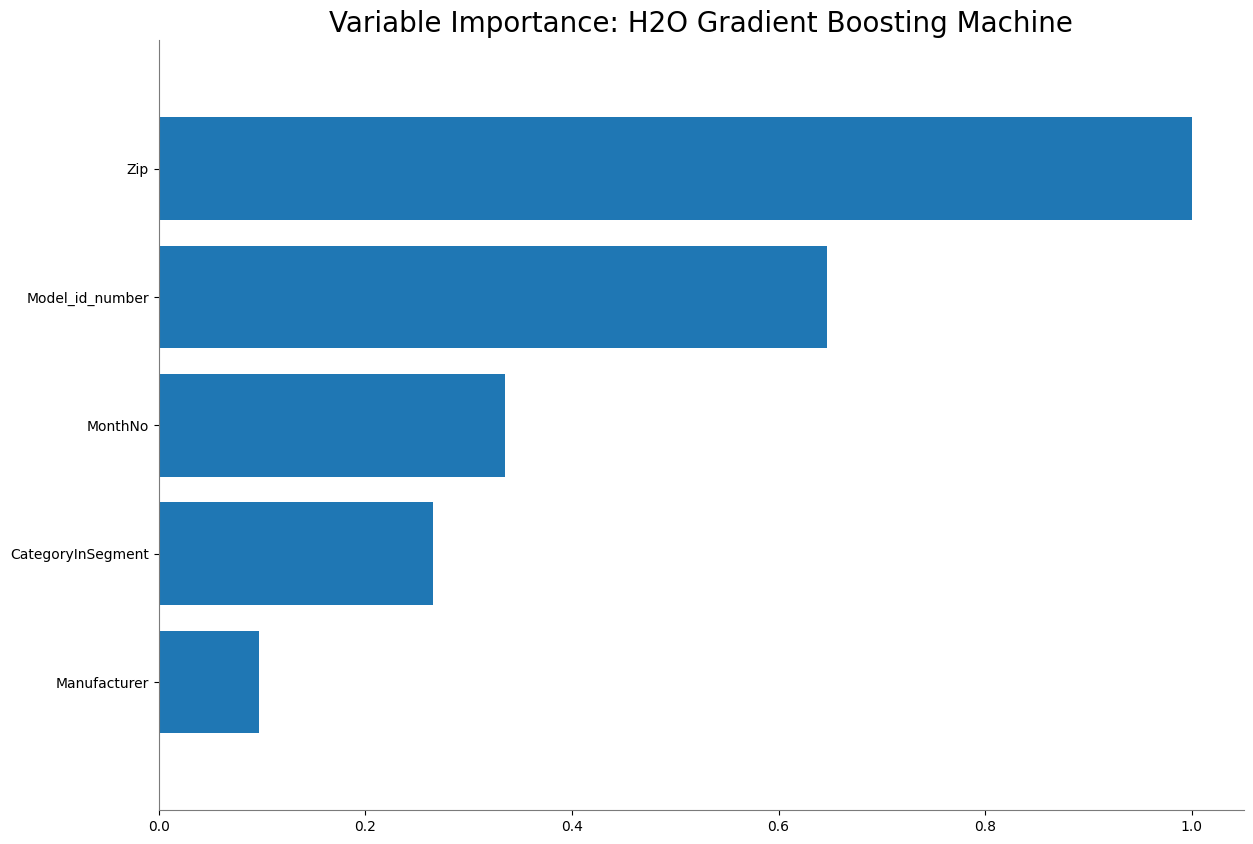

Model ID: XGBoost_3_AutoML_2_20230928_144236


<Figure size 640x480 with 0 Axes>

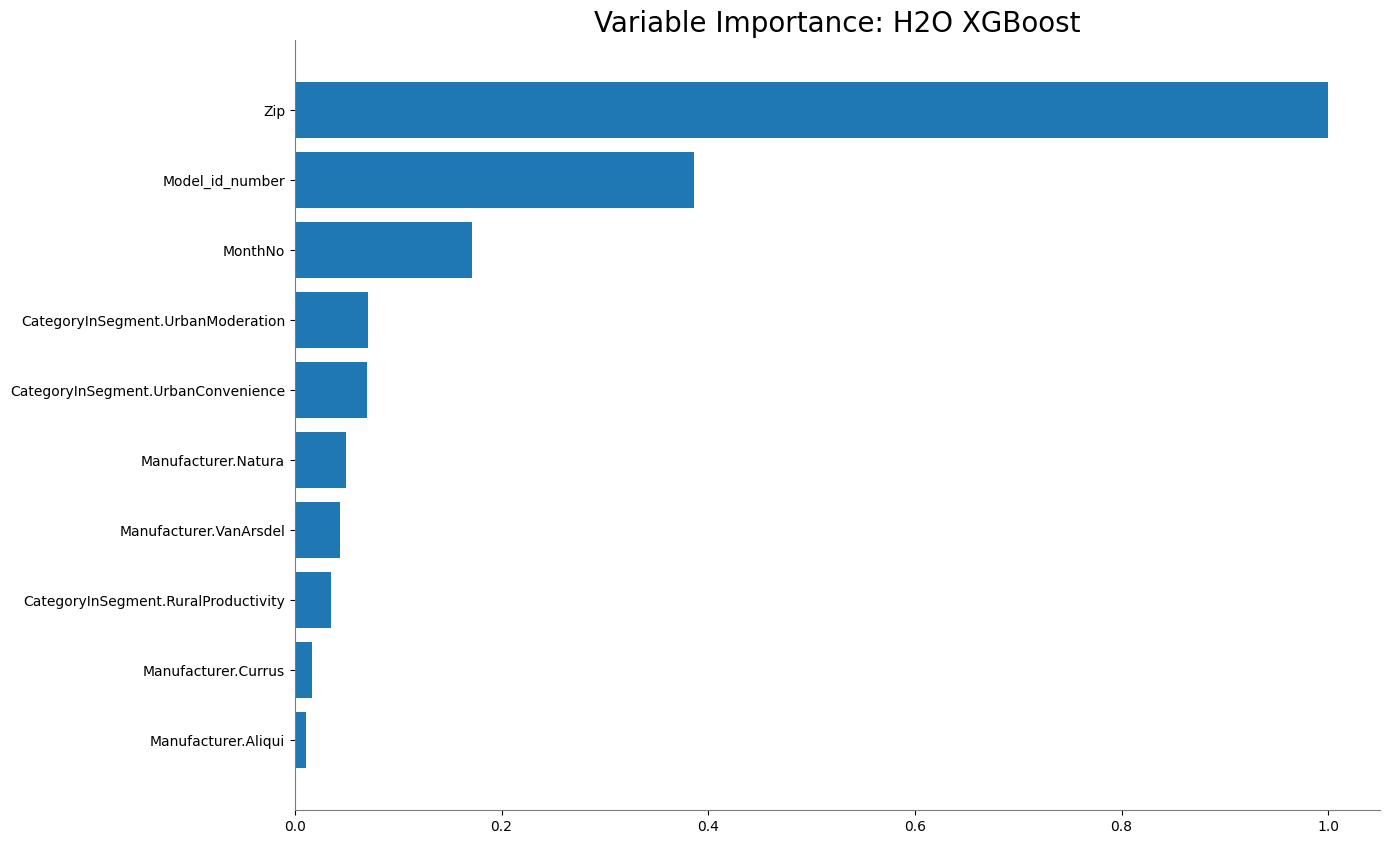

Model ID: GBM_1_AutoML_2_20230928_144236


<Figure size 640x480 with 0 Axes>

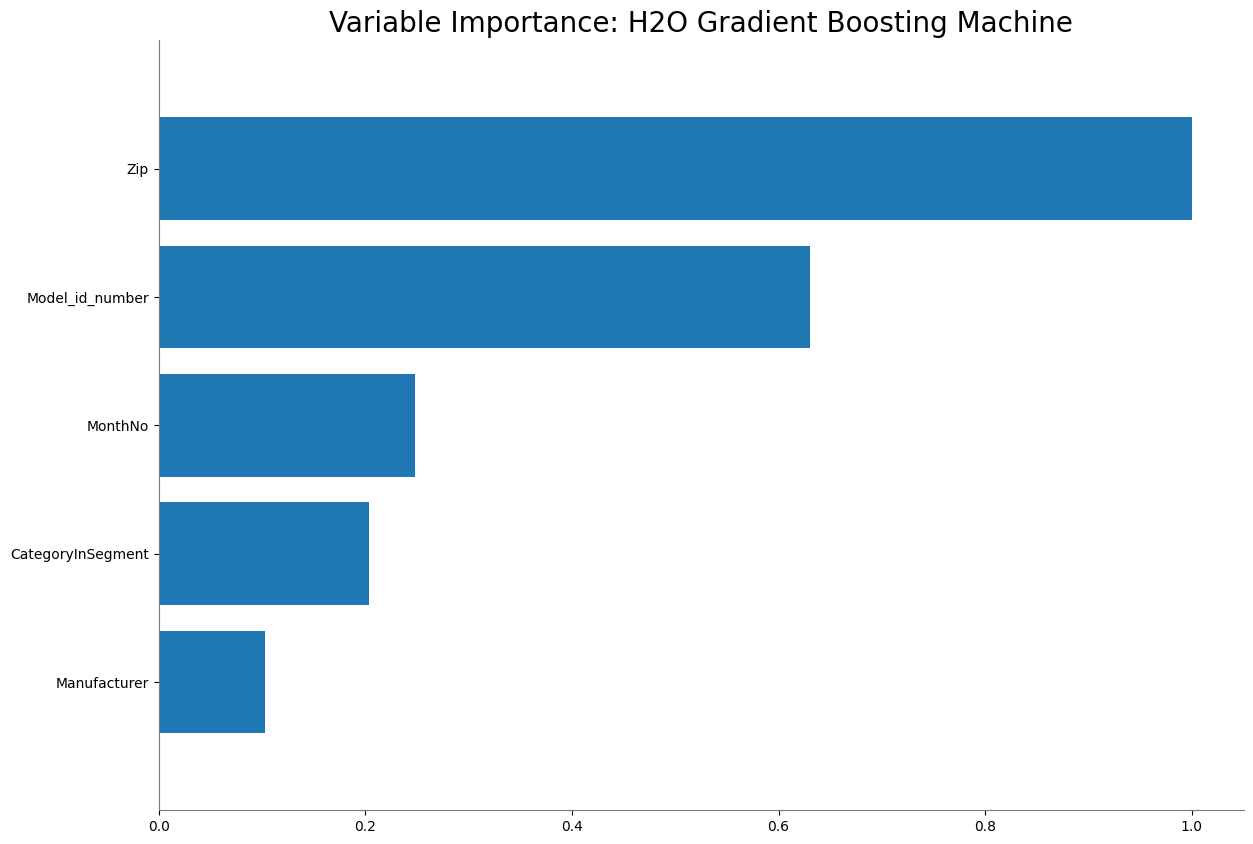

Model ID: GBM_2_AutoML_2_20230928_144236


<Figure size 640x480 with 0 Axes>

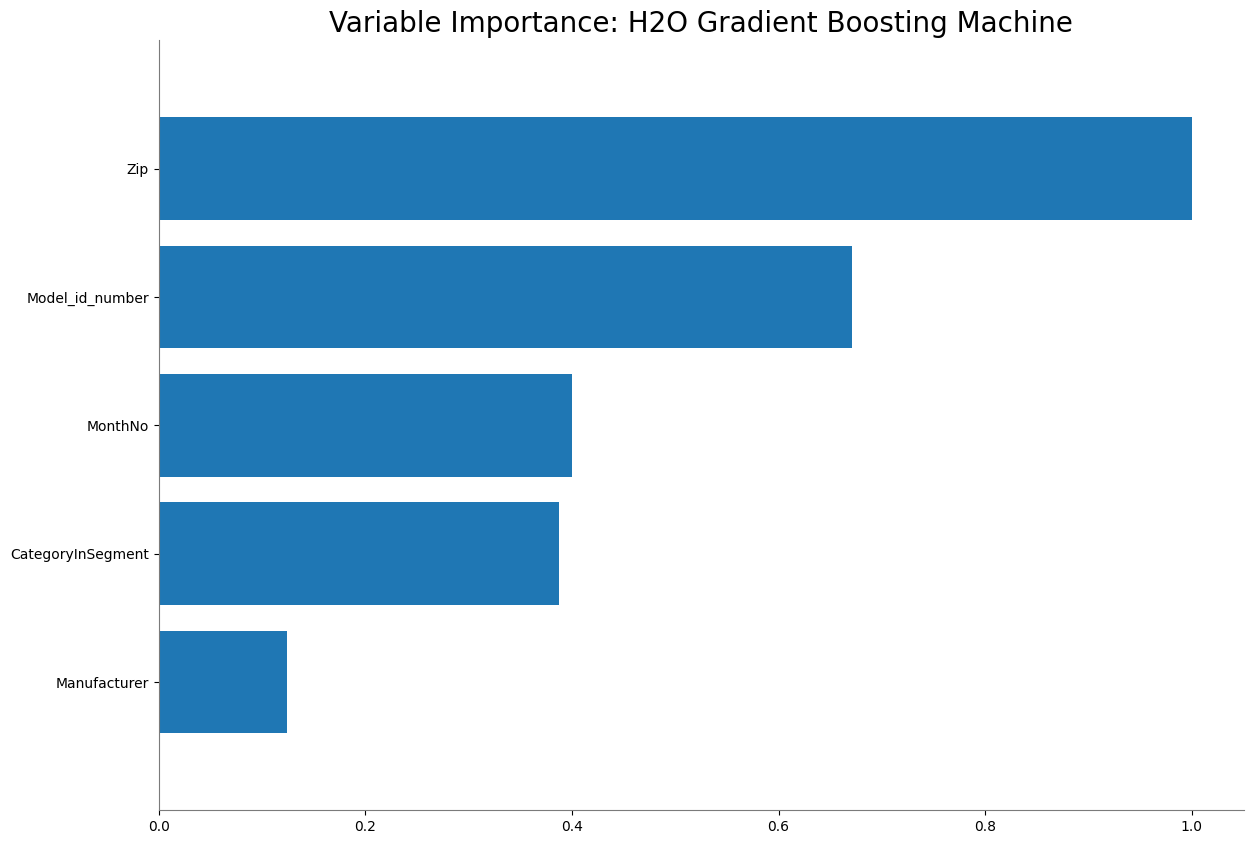

Model ID: DRF_1_AutoML_2_20230928_144236


<Figure size 640x480 with 0 Axes>

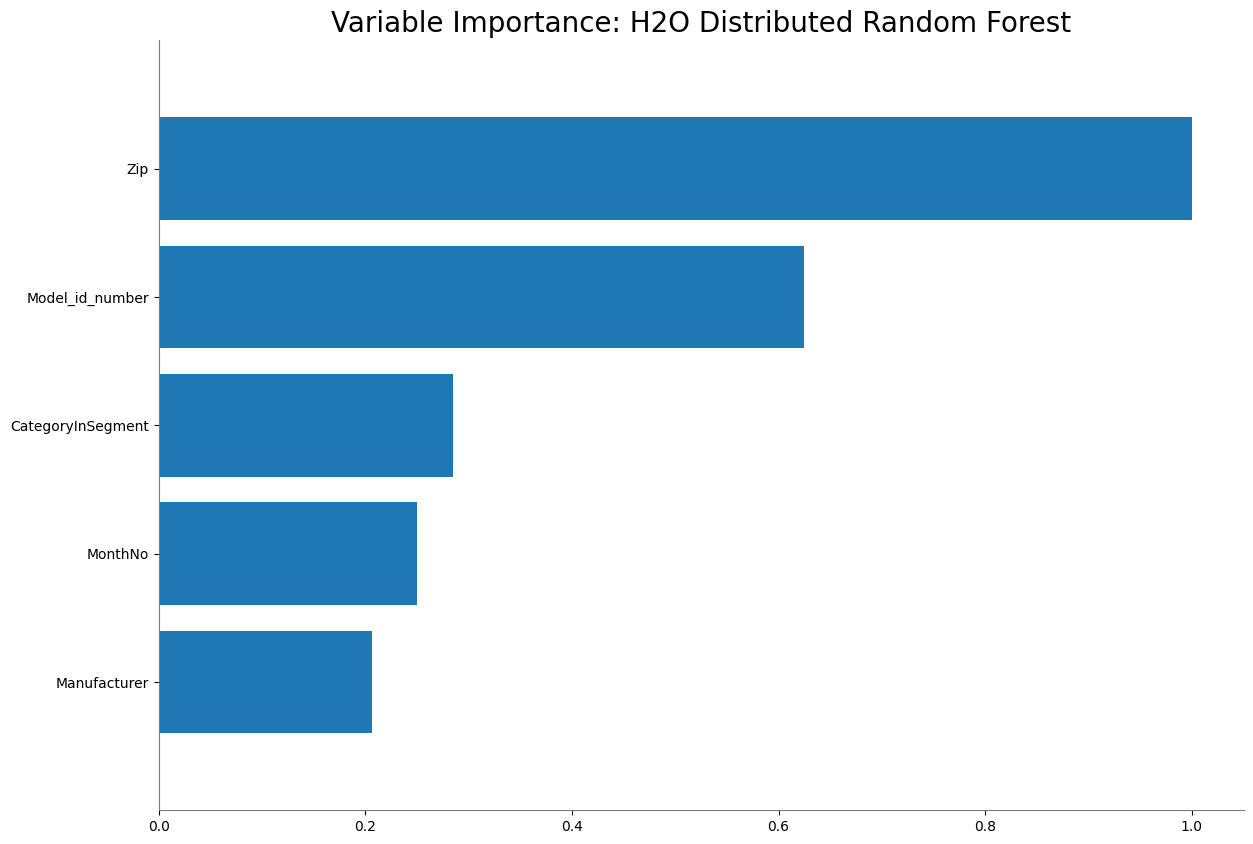

Model ID: XRT_1_AutoML_2_20230928_144236


<Figure size 640x480 with 0 Axes>

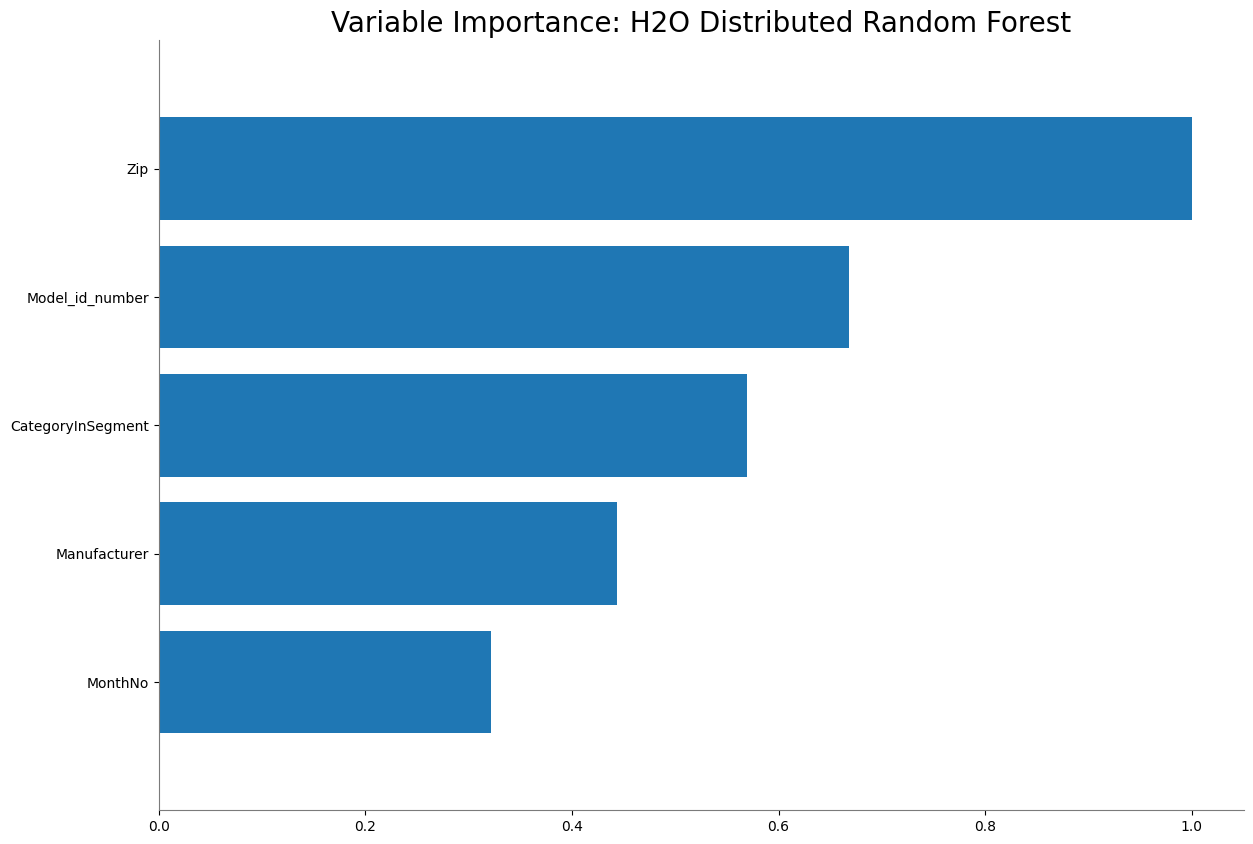

Model ID: GLM_1_AutoML_2_20230928_144236


<Figure size 640x480 with 0 Axes>

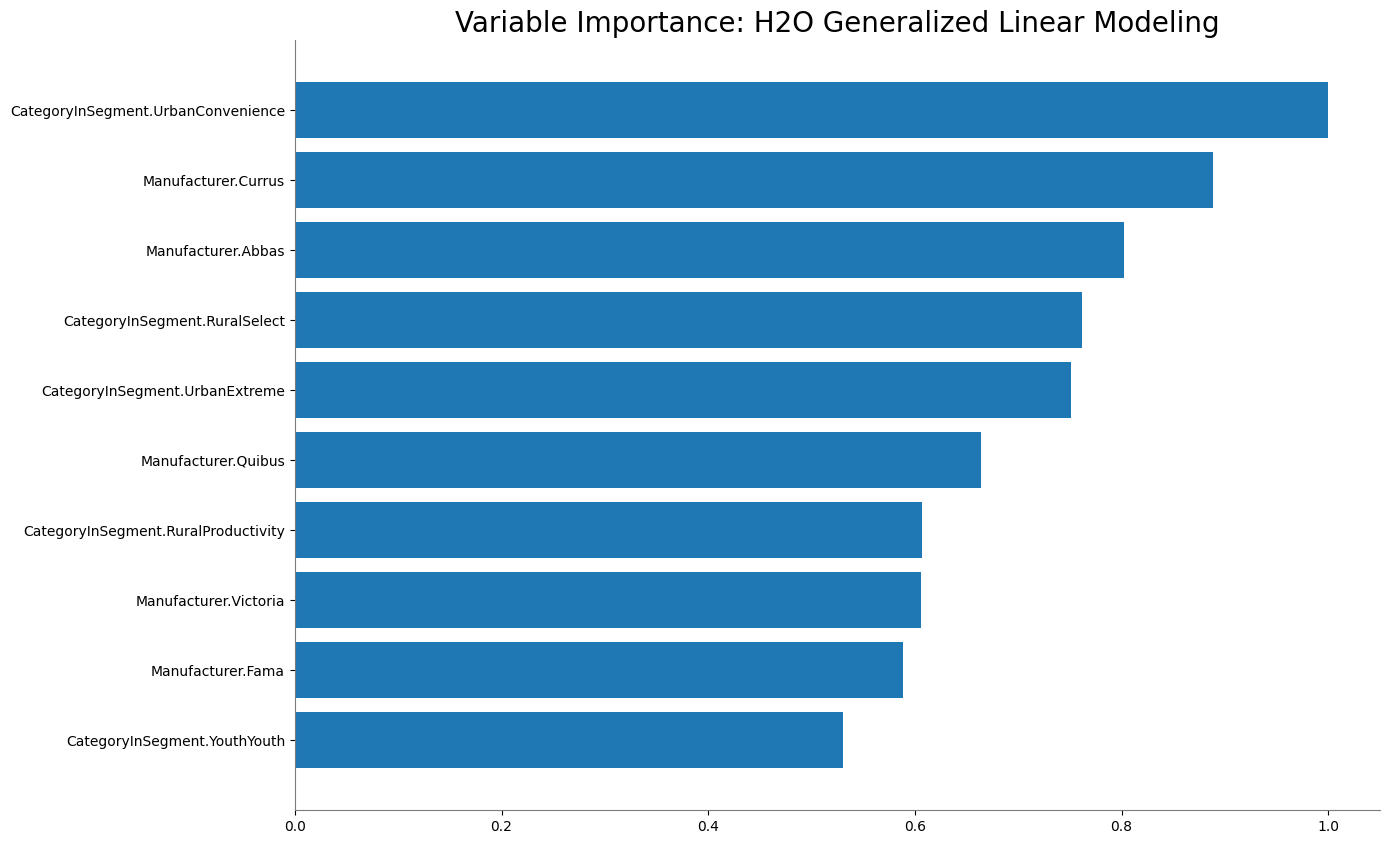

<Figure size 640x480 with 0 Axes>

In [12]:
for model_id in model_ids:
  try:
    print(f"Model ID: {model_id}")
    aml_unit = h2o.get_model(model_id)
    aml_unit.varimp_plot()
  except:
    print(f"{model_id} - ERROR PLOTTING") 

# Что с переобученносью

In [14]:
import pandas as pd
from sklearn.metrics import r2_score

for model_id in model_ids:
  try:
    print(f"Model ID: {model_id}")
    aml_unit = h2o.get_model(model_id)
    perf = aml_unit.model_performance(valid)
    print(perf)
    print(f"R2 cross validation: {aml_unit.r2()}")
    print(f"R2 test validation: {aml_unit.r2(valid=True)}")
    # прогноз лидирующей моделю на валидационной выборке
    val_pred=aml_unit.predict(unseen).as_data_frame()
    # из валидационного датасеат возбму столбец Stay и сконвертиую его в пандас датафрейм
    val_test = unseen['Units'].as_data_frame()
    r2_unseen = r2_score(val_test, val_pred)
    print(f"R2 unseen dataset validation: {r2_unseen}")
    print("-------------------\n-------------------")
  except:
    print(f"{model_id} - ERROR CALCULATE PERFOMANCE")

Model ID: XGBoost_1_AutoML_2_20230928_144236
ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 0.09901872380269561
RMSE: 0.31467240712000094
MAE: 0.07274516520059347
RMSLE: 0.08463410164326422
Mean Residual Deviance: 0.09901872380269561
R2 cross validation: 0.3959643960313689
R2 test validation: 0.09581251313829142
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
R2 unseen dataset validation: 0.031416793278436494
-------------------
-------------------
Model ID: XGBoost_2_AutoML_2_20230928_144236
ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 0.10128692187716822
RMSE: 0.3182560633784818
MAE: 0.057924971279799835
RMSLE: 0.0796855481410856
Mean Residual Deviance: 0.10128692187716822
R2 cross validation: 0.24772465483327488
R2 test validation: 0.07510050799521839
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
R2 unseen dataset validation: 0.04518497141715949
-

# Графии кривых обучения

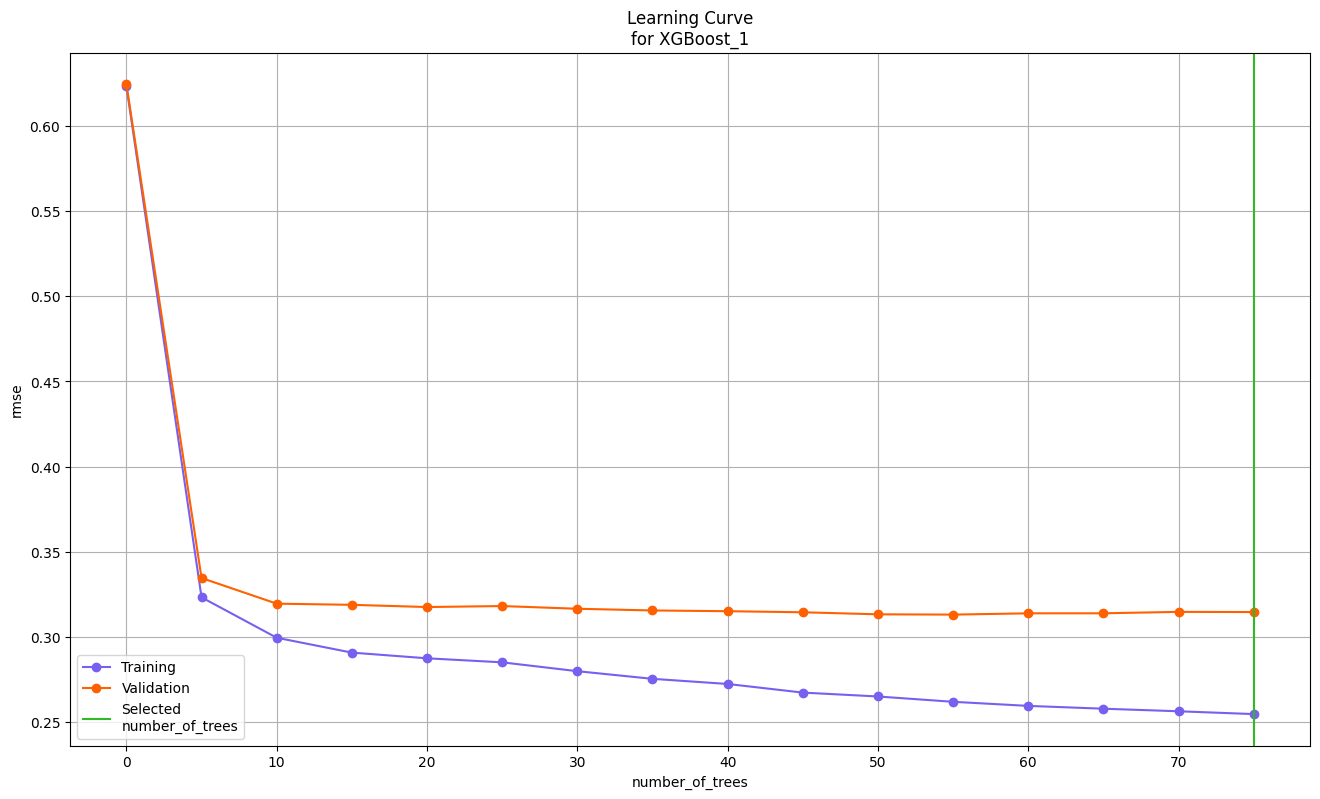

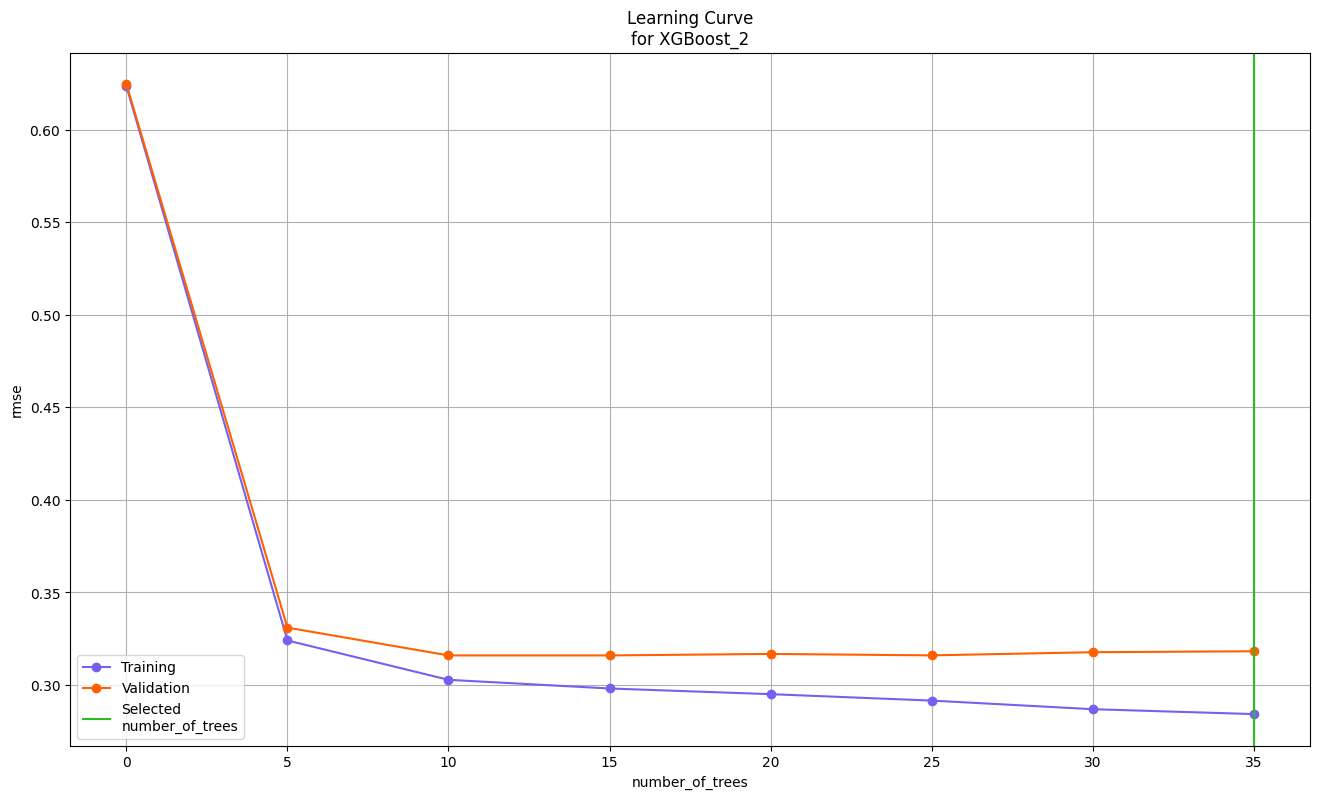

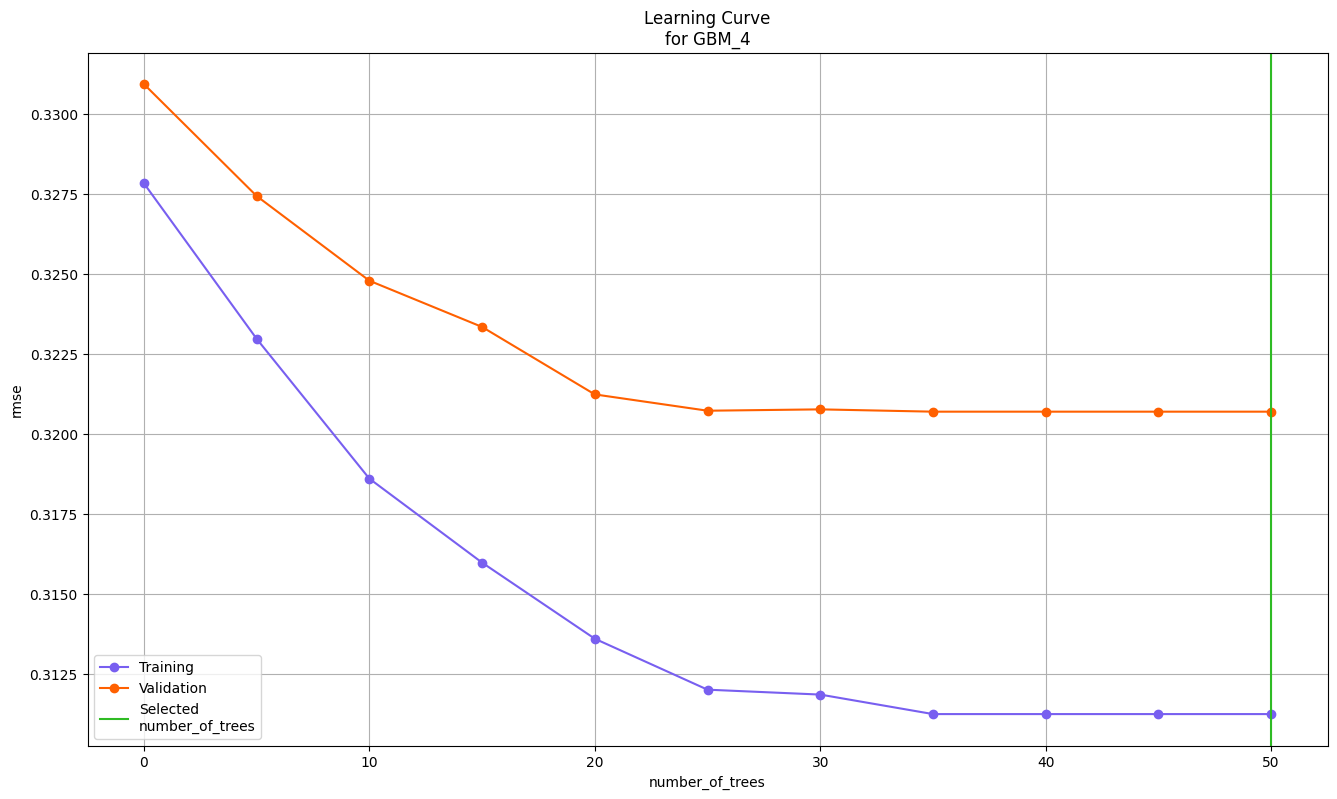

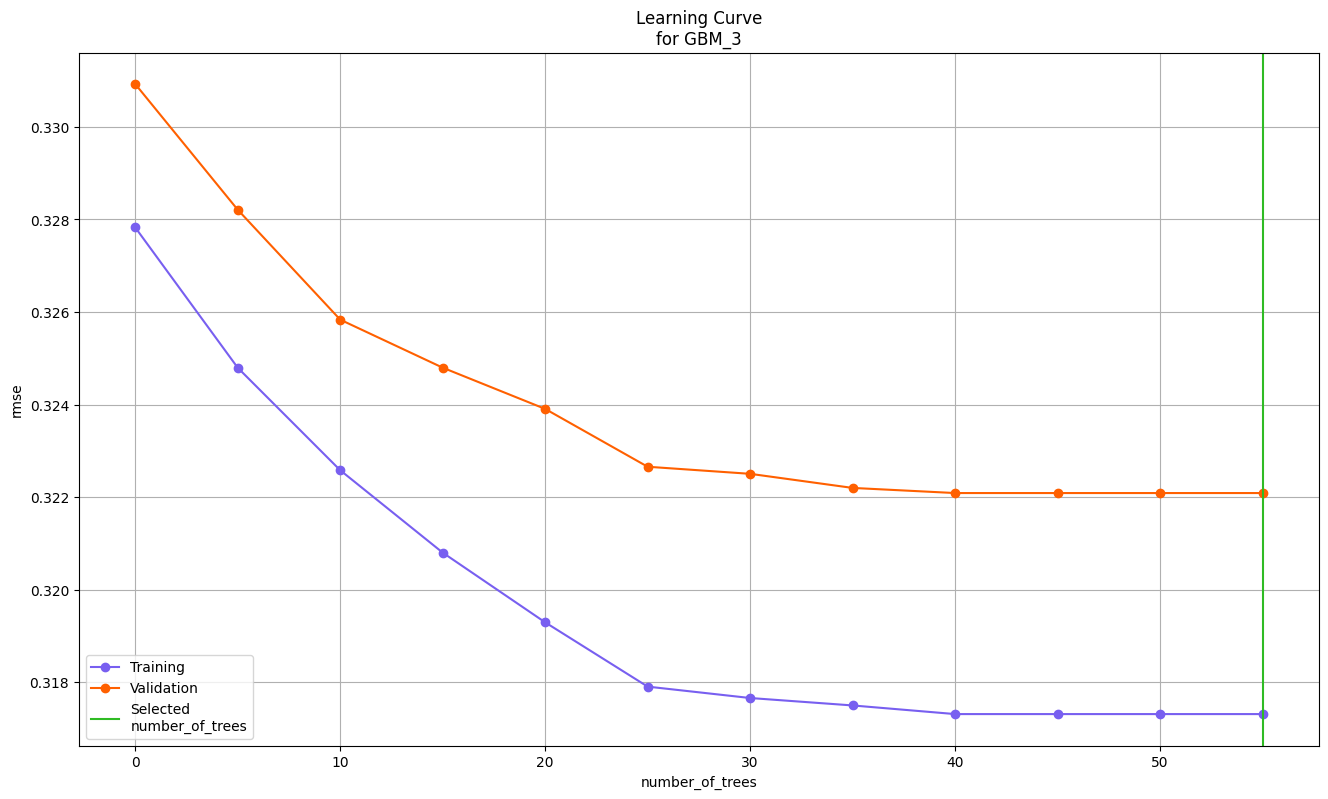

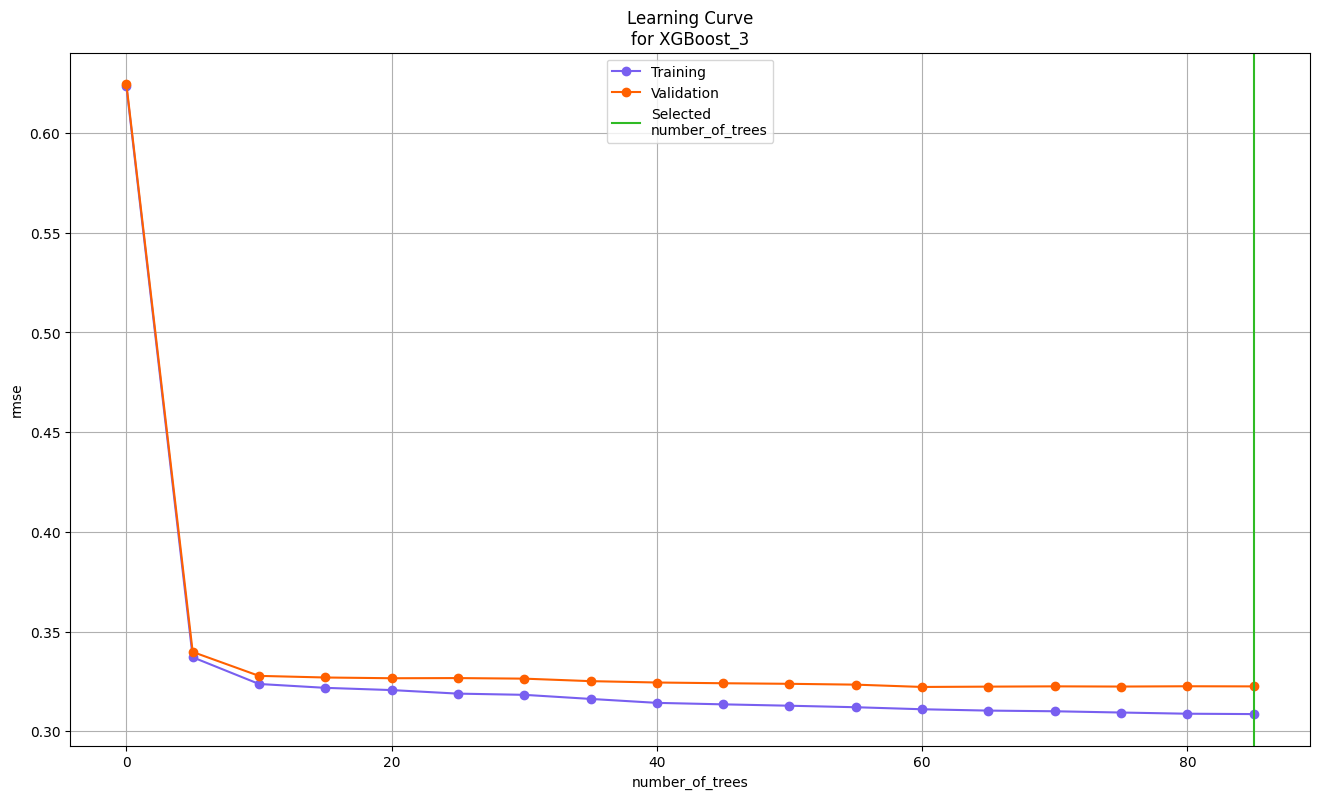

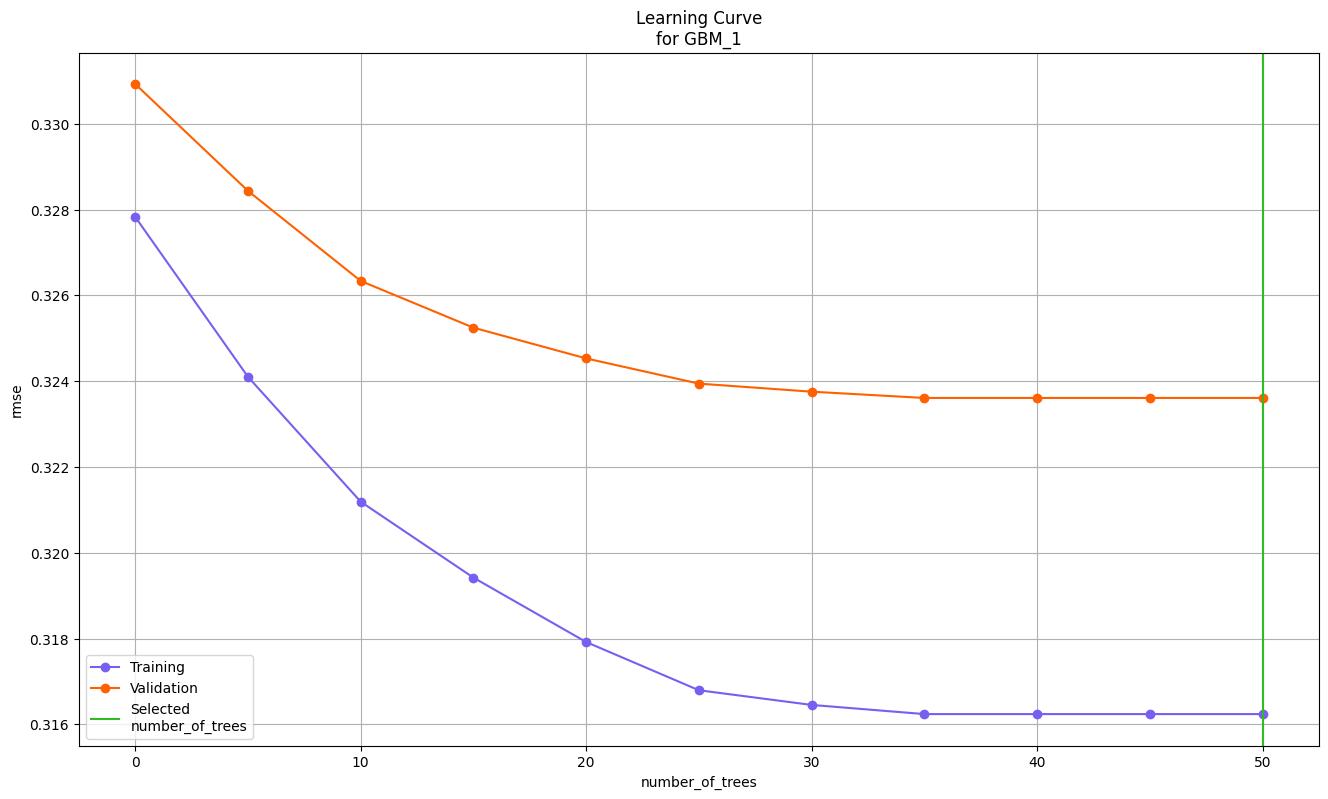

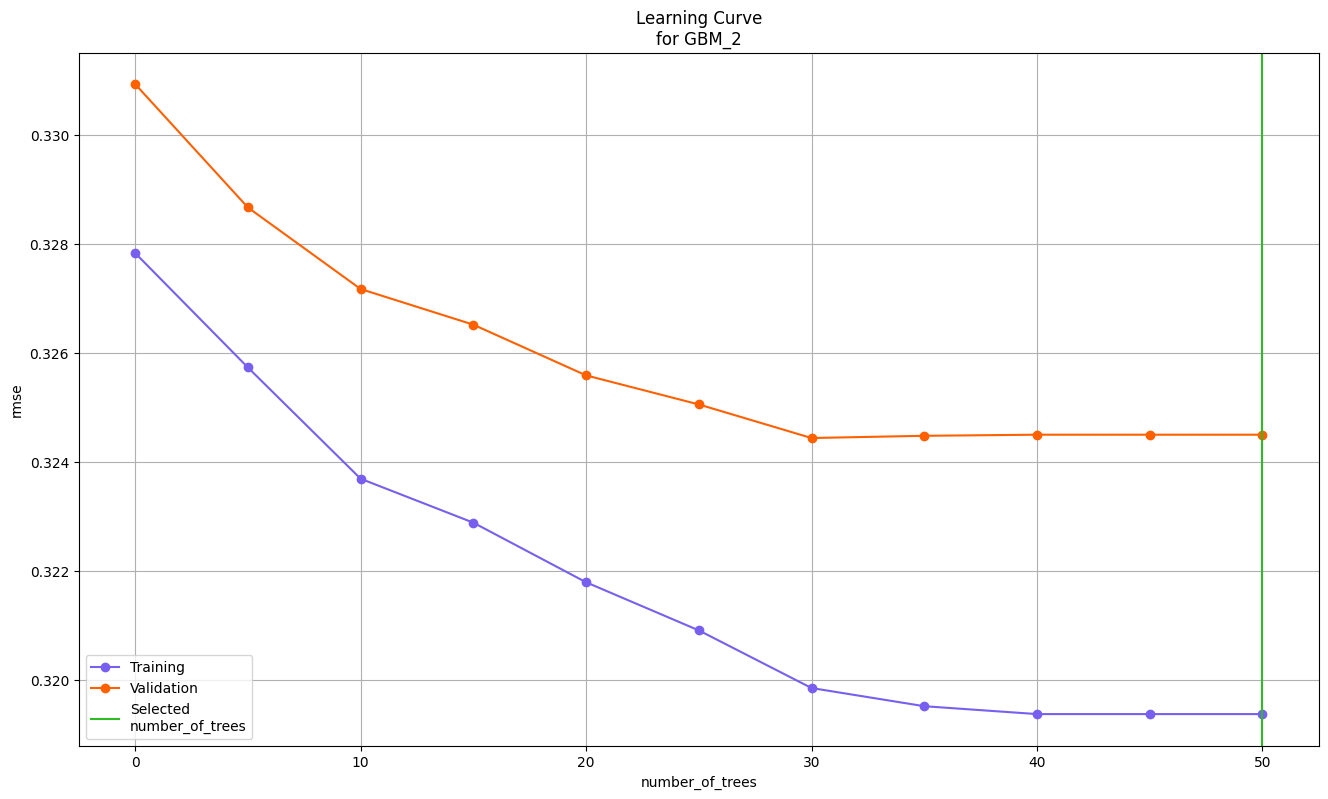

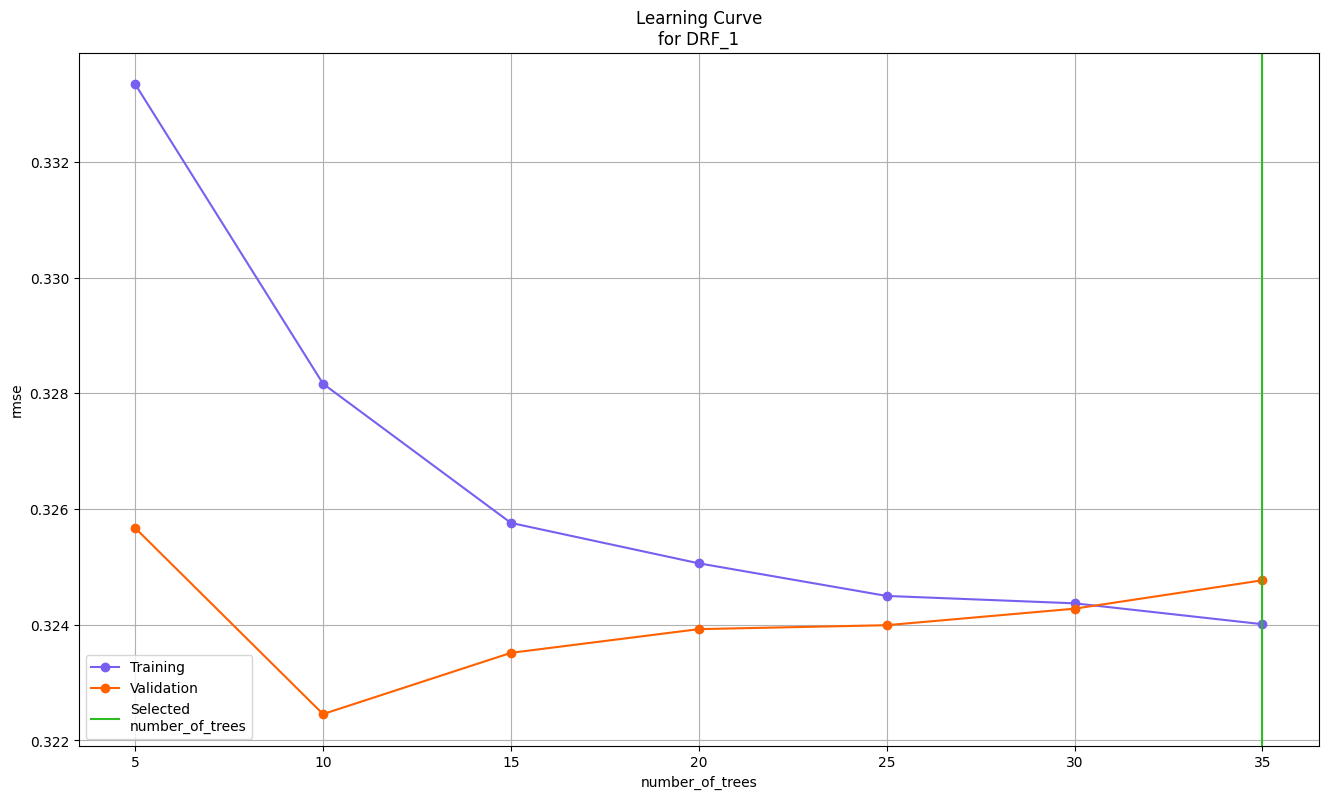

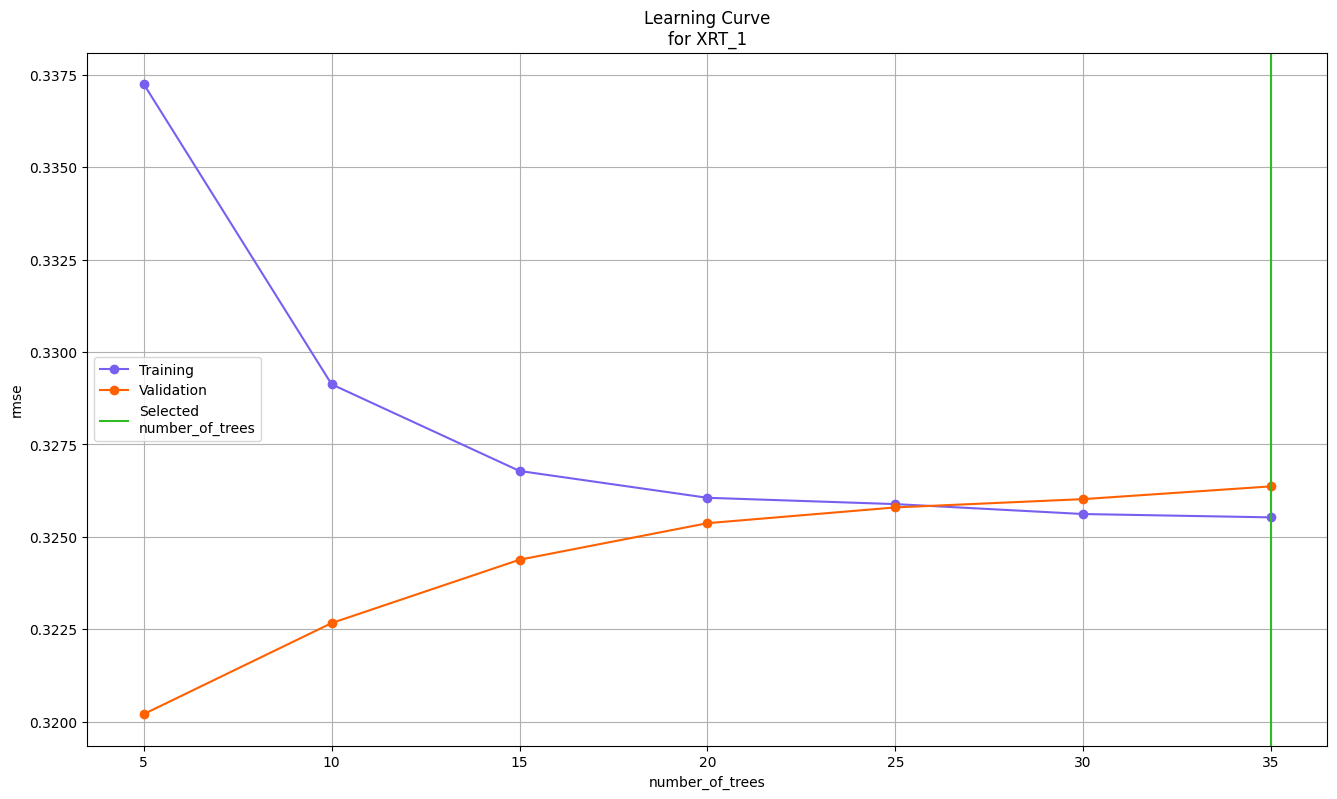

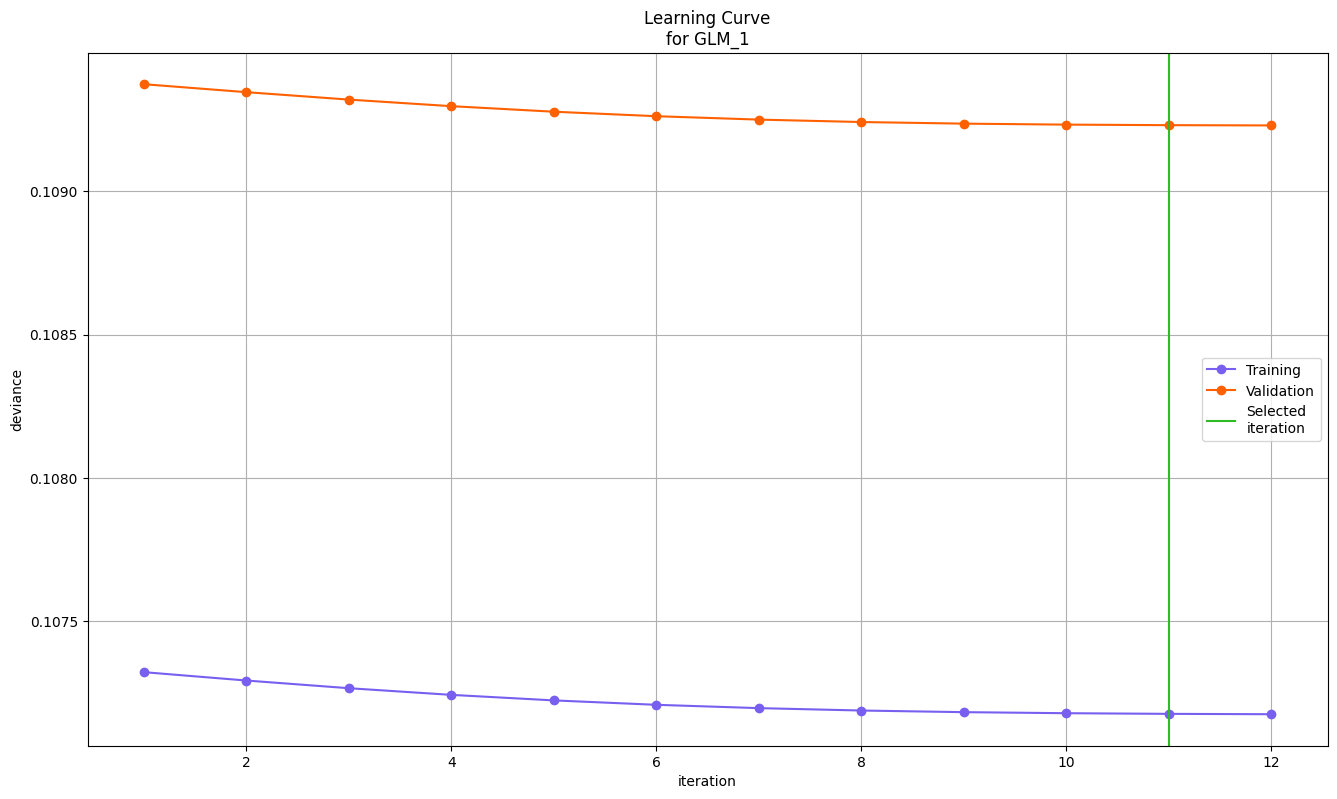

In [15]:
for model_id in model_ids:
  try:
    learning_curve_plot = h2o.get_model(model_id).learning_curve_plot()
  except:
    print(model_id, "- ERROR PLOT")

# Сохранение лучше модели

Довольно стаблильный показатель по Р-квадарт

In [ ]:
#besy_model_id = 'StackedEnsemble_BestOfFamily_1_AutoML_4_20230921_114817'

In [ ]:
# Сохранение лучшей модели
#besy_model = h2o.get_model(besy_model_id)
#h2o.save_model(besy_model, path = "./models")